# Import neccessary libraries


In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# Load the datasets

In [42]:
df=pd.read_csv('../Database/cleaned_data.csv')
df

,brand,dtime,atime,price,dcity,acity,class_type,ddate,flytime_hours
0,Vietravel Airlines,23:59,02:15,1377000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.266667
1,VietJet Air,22:25,00:35,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667
2,VietJet Air,23:30,01:35,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.083333
3,VietJet Air,23:40,01:50,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667
4,VietJet Air,21:40,23:50,1563000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667
...,...,...,...,...,...,...,...,...,...
53887,VietJet Air,11:25,19:45,6217000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333
53888,VietJet Air,11:25,19:45,10091000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333
53889,VietJet Air,11:25,19:45,10387000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333
53890,VietJet Air,11:25,19:45,10402000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333


In [43]:
str2name = {'hanoi': 'Hà Nội', 'da-nang': 'Đà Nẵng', 'ho-chi-minh-city': 'Hồ Chí Minh', 'phu-quoc-island': 'Phú Quốc', 'vinh': 'Vinh', 'hue': 'Huế', 'con-dao-island': 'Côn Đảo', 'Da-lat': 'Đà Lạt', 'dong-hoi': 'Đồng Hới', 'pleiku': 'Pleiku', 'haiphong': 'Hải Phòng', 'nha-trang': 'Nha Trang', 'chu-lai': 'Chu Lai', 'buon-ma-thuot': 'Buôn Ma Thuột', 'Can-tho': 'Cần Thơ', 'dien-bien-phu': 'Điện Biên Phủ', 'ca-mau': 'Cà Mau', 'rach-gia': 'Rạch Giá'}
try:
    df['acity'] = df['acity'].apply(lambda x: str2name[x])
    df['dcity'] = df['dcity'].apply(lambda x: str2name[x])
except KeyError:
    pass
df

,brand,dtime,atime,price,dcity,acity,class_type,ddate,flytime_hours
0,Vietravel Airlines,23:59,02:15,1377000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.266667
1,VietJet Air,22:25,00:35,1447000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.166667
2,VietJet Air,23:30,01:35,1447000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.083333
3,VietJet Air,23:40,01:50,1447000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.166667
4,VietJet Air,21:40,23:50,1563000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.166667
...,...,...,...,...,...,...,...,...,...
53887,VietJet Air,11:25,19:45,6217000,Điện Biên Phủ,Hải Phòng,economy,2023-12-25,8.333333
53888,VietJet Air,11:25,19:45,10091000,Điện Biên Phủ,Hải Phòng,economy,2023-12-25,8.333333
53889,VietJet Air,11:25,19:45,10387000,Điện Biên Phủ,Hải Phòng,economy,2023-12-25,8.333333
53890,VietJet Air,11:25,19:45,10402000,Điện Biên Phủ,Hải Phòng,economy,2023-12-25,8.333333


# Feature Engineering

In [44]:
def is_transit(brand):
    if ',' in brand:
        return 1
    else:
        return 0
df['Transit'] = df['brand'].apply(is_transit)
df

,brand,dtime,atime,price,dcity,acity,class_type,ddate,flytime_hours,Transit
0,Vietravel Airlines,23:59,02:15,1377000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.266667,0
1,VietJet Air,22:25,00:35,1447000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.166667,0
2,VietJet Air,23:30,01:35,1447000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.083333,0
3,VietJet Air,23:40,01:50,1447000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.166667,0
4,VietJet Air,21:40,23:50,1563000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.166667,0
...,...,...,...,...,...,...,...,...,...,...
53887,VietJet Air,11:25,19:45,6217000,Điện Biên Phủ,Hải Phòng,economy,2023-12-25,8.333333,0
53888,VietJet Air,11:25,19:45,10091000,Điện Biên Phủ,Hải Phòng,economy,2023-12-25,8.333333,0
53889,VietJet Air,11:25,19:45,10387000,Điện Biên Phủ,Hải Phòng,economy,2023-12-25,8.333333,0
53890,VietJet Air,11:25,19:45,10402000,Điện Biên Phủ,Hải Phòng,economy,2023-12-25,8.333333,0


In [45]:
def time_category(hour):
    if 2 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 14:
        return 'Noon'
    elif 14 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:  # from 22h to 2h
        return 'Late Night'
    
df['dtime_category'] = pd.to_datetime(df['dtime']).dt.hour.apply(time_category)
df['atime_category'] = pd.to_datetime(df['atime']).dt.hour.apply(time_category)


C:\Users\2053s\AppData\Local\Temp\ipykernel_18560\963212665.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dtime_category'] = pd.to_datetime(df['dtime']).dt.hour.apply(time_category)
C:\Users\2053s\AppData\Local\Temp\ipykernel_18560\963212665.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['atime_category'] = pd.to_datetime(df['atime']).dt.hour.apply(time_category)


In [46]:
"""df['dtime'] = pd.to_datetime(df['dtime'])
df['atime'] = pd.to_datetime(df['atime'])
df['dtime'] = df['dtime'].dt.strftime('%H:%M')
df['atime'] = df['atime'].dt.strftime('%H:%M')"""
df=df.drop(['dtime','atime'],axis=1)
df

,brand,price,dcity,acity,class_type,ddate,flytime_hours,Transit,dtime_category,atime_category
0,Vietravel Airlines,1377000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.266667,0,Late Night,Early Morning
1,VietJet Air,1447000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.166667,0,Late Night,Late Night
2,VietJet Air,1447000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.083333,0,Late Night,Late Night
3,VietJet Air,1447000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.166667,0,Late Night,Late Night
4,VietJet Air,1563000,Hồ Chí Minh,Hà Nội,economy,2023-12-06,2.166667,0,Evening,Late Night
...,...,...,...,...,...,...,...,...,...,...
53887,VietJet Air,6217000,Điện Biên Phủ,Hải Phòng,economy,2023-12-25,8.333333,0,Noon,Evening
53888,VietJet Air,10091000,Điện Biên Phủ,Hải Phòng,economy,2023-12-25,8.333333,0,Noon,Evening
53889,VietJet Air,10387000,Điện Biên Phủ,Hải Phòng,economy,2023-12-25,8.333333,0,Noon,Evening
53890,VietJet Air,10402000,Điện Biên Phủ,Hải Phòng,economy,2023-12-25,8.333333,0,Noon,Evening


Extract features from ddate

In [47]:
df['ddate'] = pd.to_datetime(df['ddate'])
df['day_of_week'] = df['ddate'].dt.dayofweek
df['month'] = df['ddate'].dt.month
df['day_of_year'] = df['ddate'].dt.dayofyear

df=df.drop(['ddate'],axis=1)
df

,brand,price,dcity,acity,class_type,flytime_hours,Transit,dtime_category,atime_category,day_of_week,month,day_of_year
0,Vietravel Airlines,1377000,Hồ Chí Minh,Hà Nội,economy,2.266667,0,Late Night,Early Morning,2,12,340
1,VietJet Air,1447000,Hồ Chí Minh,Hà Nội,economy,2.166667,0,Late Night,Late Night,2,12,340
2,VietJet Air,1447000,Hồ Chí Minh,Hà Nội,economy,2.083333,0,Late Night,Late Night,2,12,340
3,VietJet Air,1447000,Hồ Chí Minh,Hà Nội,economy,2.166667,0,Late Night,Late Night,2,12,340
4,VietJet Air,1563000,Hồ Chí Minh,Hà Nội,economy,2.166667,0,Evening,Late Night,2,12,340
...,...,...,...,...,...,...,...,...,...,...,...,...
53887,VietJet Air,6217000,Điện Biên Phủ,Hải Phòng,economy,8.333333,0,Noon,Evening,0,12,359
53888,VietJet Air,10091000,Điện Biên Phủ,Hải Phòng,economy,8.333333,0,Noon,Evening,0,12,359
53889,VietJet Air,10387000,Điện Biên Phủ,Hải Phòng,economy,8.333333,0,Noon,Evening,0,12,359
53890,VietJet Air,10402000,Điện Biên Phủ,Hải Phòng,economy,8.333333,0,Noon,Evening,0,12,359


# Filtering unwanted outliners

## 1. Price

Our flight dataset contains price information for both Economy and Business class tickets. However, the Business class data is significantly less in volume compared to the Economy class data, which may lead to the misidentification of Business class prices as outliers. To address this issue, it's important to segregate the dataset into two distinct groups based on the class of service—Economy and Business. Once separated, we can then proceed to identify and remove outliers within each category to ensure a more accurate analysis.

In [48]:
economy_df = df[df['class_type'] == 'economy']
business_df = df[df['class_type'] == 'business']

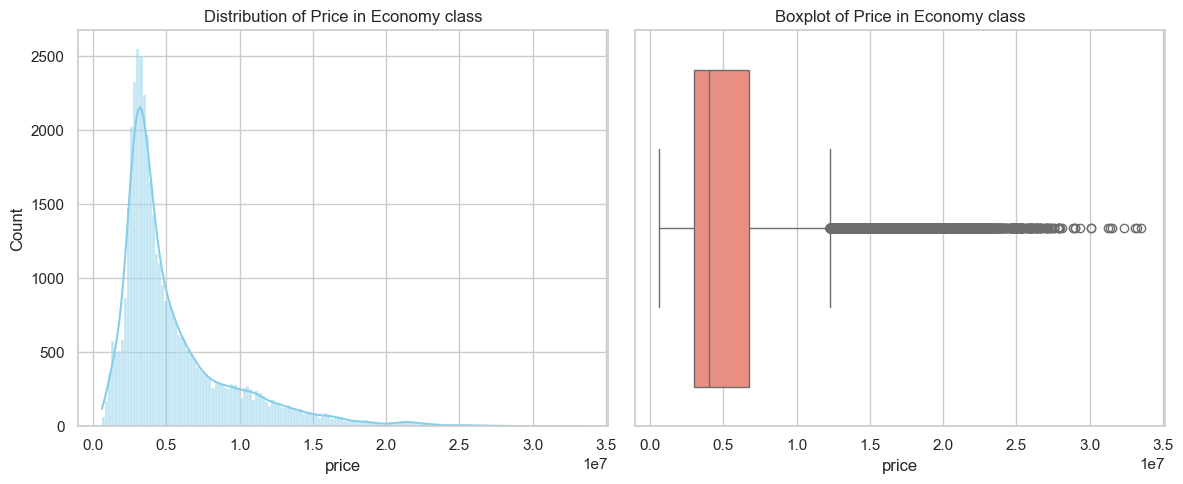

In [49]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(economy_df['price'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribution of Price in Economy class')

sns.boxplot(x=economy_df['price'], ax=axs[1], color='salmon')
axs[1].set_title('Boxplot of Price in Economy class')

plt.tight_layout()

plt.show()

The distribution of price in the economy class is highly skewed to the right, as seen in the histogram on the left. Given the skewness of the data, using the Z-Score method might not be as effective because the Z-Score method assumes a normal distribution of data, which is clearly not the case here. The IQR method does not make this assumption and is therefore more suitable for this dataset. The boxplot shows there is a significant number of outliers, which are the individual points above the upper whisker of the boxplot. These outliers indicate prices that are much higher than the typical Economy class price range. 

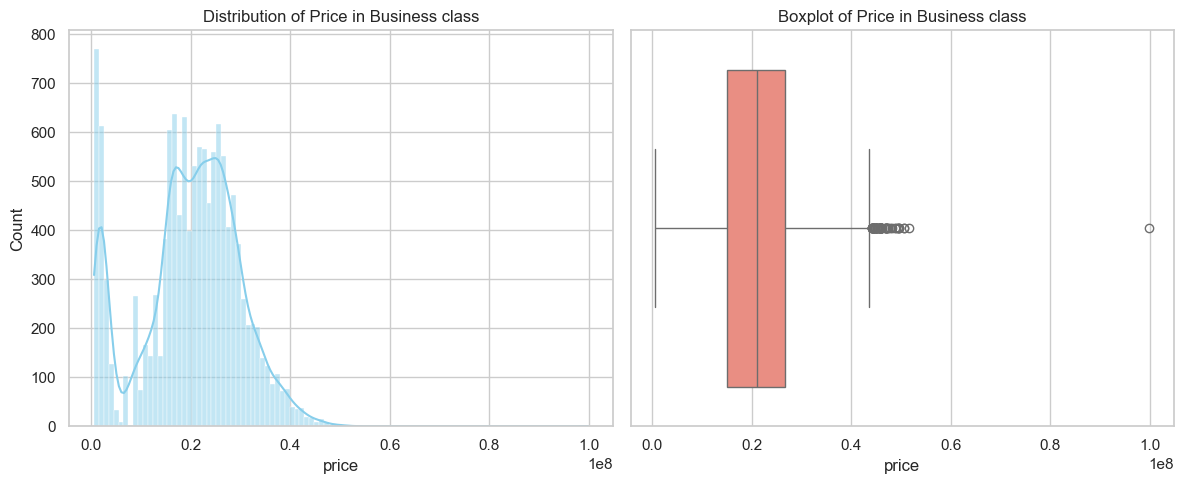

In [50]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(business_df['price'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribution of Price in Business class')

sns.boxplot(x=business_df['price'], ax=axs[1], color='salmon')
axs[1].set_title('Boxplot of Price in Business class')

plt.tight_layout()

plt.show()

The histogram on the left shows a right-skewed distribution, similar to the economy class, but with a less pronounced tail. This indicates that while most prices are concentrated on the lower end, there are fewer extreme high values compared to the economy class. There are fewer outliers in the Business class boxplot compared to the Economy class, but there are still some prices that are significantly higher than the rest.

Given the skewness of the distribution, the Interquartile Range (IQR) method would again be the most appropriate for outlier removal. 

In [51]:
def outlier_bounds(prices):
    Q1 = prices.quantile(0.25)
    Q3 = prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.25 * IQR
    upper_bound = Q3 + 1.25 * IQR
    return lower_bound, upper_bound

economy_prices = economy_df['price']
lower_bound_economy, upper_bound_economy = outlier_bounds(economy_prices)

business_prices = business_df['price']
lower_bound_business, upper_bound_business = outlier_bounds(business_prices)

df_filtered = df[((df['class_type'] == 'economy') & (df['price'] >= lower_bound_economy) & (df['price'] <= upper_bound_economy)) |
                 ((df['class_type'] == 'business') & (df['price'] >= lower_bound_business) & (df['price'] <= upper_bound_business))]

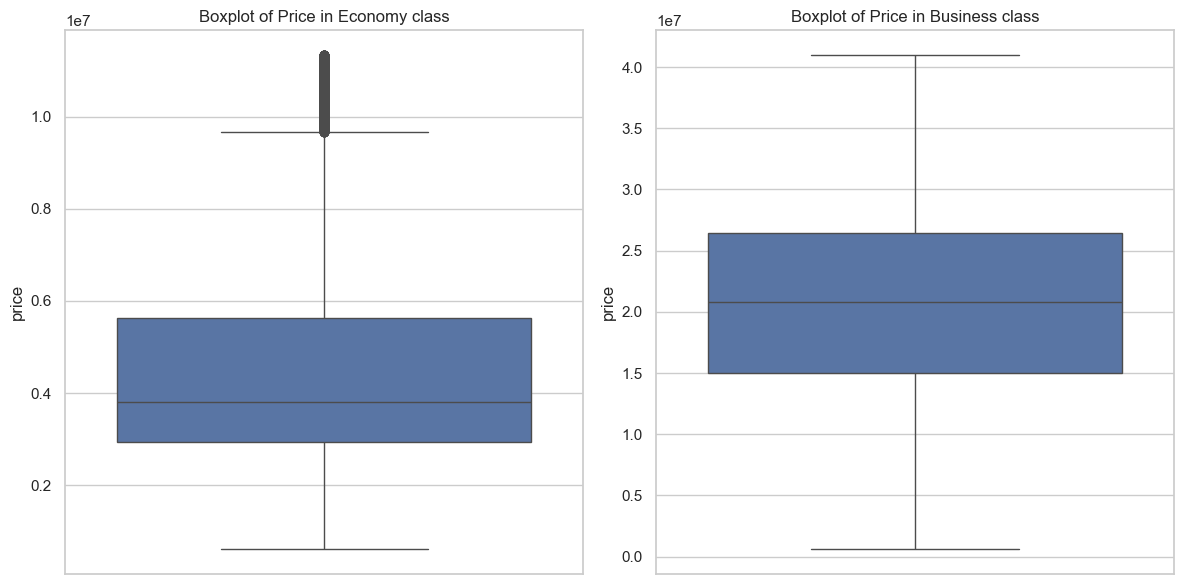

In [34]:
economy_df_filtered = df_filtered[df_filtered['class_type'] == 'economy']
business_df_filtered = df_filtered[df_filtered['class_type'] == 'business']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
sns.boxplot(x='After removing outliners',y='price', data=economy_df_filtered).set_title('Boxplot of Price in Economy class')

plt.subplot(1, 2, 2)
sns.boxplot(x='After removing outliners',y='price', data=business_df_filtered).set_title('Boxplot of Price in Business class')

plt.tight_layout()
plt.show()

After the outlier removal process, the boxplots indicate that outliers have been significantly reduced in both the economy and business classes. In the economy class, a few outliers remain, suggesting that while most ticket prices are within a certain range, there are a few tickets with prices that are substantially higher than the average. These outliers could be due to factors such as peak travel times, special services, or other premium factors that command higher prices.
In the business class, the boxplot shows no apparent outliers, indicating a more uniform pricing structure within the range of data considered. This could imply that business class pricing is more consistent, or that the outlier removal process has effectively normalized the data within a certain threshold.
The presence of a small number of outliers in the economy class, as seen in the boxplot, can be interpreted as a natural variation in the pricing structure. These outliers may be valuable for understanding the full spectrum of pricing strategies used by airlines, as they could represent special cases or premium offerings that are not part of the standard pricing model. 

# Feature encoding

Columns need to be encoded: brand, dcity, acity, class_type, dtime_category and atime_category

+ Norminal data: brand, dcity, acity, dtime_category, atime_category
+ Ordinal data: class_type

-> Norminal data: Binary encode

-> Ordinal data: Ordinal encode

In [52]:
import category_encoders as ce

encoder_binary = ce.BinaryEncoder(cols=['brand', 'dcity', 'acity','dtime_category','atime_category'])
encoded_data_binary = encoder_binary.fit_transform(df_filtered)

encoder_ordinal = ce.OrdinalEncoder(cols=['class_type'], mapping=[{'col': 'class_type', 'mapping': {'economy': 1, 'business': 2}}])
encoded_data_ordinal = encoder_ordinal.fit_transform(encoded_data_binary)

encoded_data_ordinal

,brand_0,brand_1,brand_2,brand_3,brand_4,price,dcity_0,dcity_1,dcity_2,dcity_3,...,Transit,dtime_category_0,dtime_category_1,dtime_category_2,atime_category_0,atime_category_1,atime_category_2,day_of_week,month,day_of_year
0,0,0,0,0,1,1377000,0,0,0,0,...,0,0,0,1,0,0,1,2,12,340
1,0,0,0,1,0,1447000,0,0,0,0,...,0,0,0,1,0,1,0,2,12,340
2,0,0,0,1,0,1447000,0,0,0,0,...,0,0,0,1,0,1,0,2,12,340
3,0,0,0,1,0,1447000,0,0,0,0,...,0,0,0,1,0,1,0,2,12,340
4,0,0,0,1,0,1563000,0,0,0,0,...,0,0,1,0,0,1,0,2,12,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53887,0,0,0,1,0,6217000,1,0,0,0,...,0,1,0,0,0,1,1,0,12,359
53888,0,0,0,1,0,10091000,1,0,0,0,...,0,1,0,0,0,1,1,0,12,359
53889,0,0,0,1,0,10387000,1,0,0,0,...,0,1,0,0,0,1,1,0,12,359
53890,0,0,0,1,0,10402000,1,0,0,0,...,0,1,0,0,0,1,1,0,12,359


# Feature scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
encoded_data_ordinal[['price', 'flytime_hours']] = scaler.fit_transform(encoded_data_ordinal[['price', 'flytime_hours']])
encoded_data_ordinal

,brand_0,brand_1,brand_2,brand_3,brand_4,price,dcity_0,dcity_1,dcity_2,dcity_3,...,Transit,dtime_category_0,dtime_category_1,dtime_category_2,atime_category_0,atime_category_1,atime_category_2,day_of_week,month,day_of_year
0,0,0,0,0,1,0.019123,0,0,0,0,...,0,0,0,1,0,0,1,2,12,340
1,0,0,0,1,0,0.020857,0,0,0,0,...,0,0,0,1,0,1,0,2,12,340
2,0,0,0,1,0,0.020857,0,0,0,0,...,0,0,0,1,0,1,0,2,12,340
3,0,0,0,1,0,0.020857,0,0,0,0,...,0,0,0,1,0,1,0,2,12,340
4,0,0,0,1,0,0.023730,0,0,0,0,...,0,0,1,0,0,1,0,2,12,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53887,0,0,0,1,0,0.139011,1,0,0,0,...,0,1,0,0,0,1,1,0,12,359
53888,0,0,0,1,0,0.234971,1,0,0,0,...,0,1,0,0,0,1,1,0,12,359
53889,0,0,0,1,0,0.242303,1,0,0,0,...,0,1,0,0,0,1,1,0,12,359
53890,0,0,0,1,0,0.242674,1,0,0,0,...,0,1,0,0,0,1,1,0,12,359


# Feature selection

Through exploratory data analysis (EDA) and confirmatory data analysis (CDA), we have established that the route (determined by departure and arrival cities), airline brand, and time categories (departure and arrival times) significantly influence ticket prices. The visualizations in the provided graphs corroborate this finding, highlighting the importance of these factors in price determination for both economy and business class flights.
However, it is also clear that these are not the only variables affecting price. To develop robust predictive models, we must judiciously select additional attributes that could impact pricing. This selection process should be informed by domain knowledge, data understanding, and possibly further analysis to identify other relevant factors.

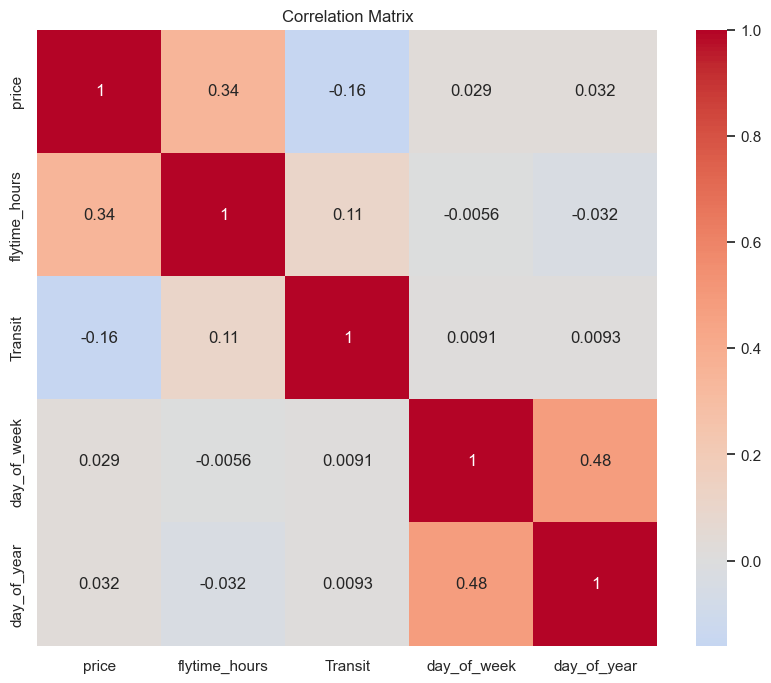

In [57]:
features = encoded_data_ordinal[['price','flytime_hours','Transit','day_of_week','day_of_year']]
correlation_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Save the dataset

In [58]:
encoded_data_ordinal.to_csv('preprocessed_data.csv', index=False)